In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

# 데이터 불러오기
wine = pd.read_csv('https://bit.ly/wine_csv_data')

In [5]:
# 불러온 데이터 확인
wine

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [6]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [8]:
# feature 데이터와 target 데이터 설정
data = wine[['alcohol', 'sugar', 'pH']]
target = wine['class']
print(data)
print(target)

      alcohol  sugar    pH
0         9.4    1.9  3.51
1         9.8    2.6  3.20
2         9.8    2.3  3.26
3         9.8    1.9  3.16
4         9.4    1.9  3.51
...       ...    ...   ...
6492     11.2    1.6  3.27
6493      9.6    8.0  3.15
6494      9.4    1.2  2.99
6495     12.8    1.1  3.34
6496     11.8    0.8  3.26

[6497 rows x 3 columns]
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6492    1.0
6493    1.0
6494    1.0
6495    1.0
6496    1.0
Name: class, Length: 6497, dtype: float64


In [16]:
# !pip3 install scikit-learn
from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [20]:
# 분리한 데이터set의 모양 확인
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5197, 3)
(5197,)
(1300, 3)
(1300,)


In [23]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(X_train)

train_scaled = ss.transform(X_train)
test_scaled = ss.transform(y_train)

In [24]:
# 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, X_test)

print(lr.score(train_scaled, X_test))
print(lr.score(test_scaled, y_test))

0.7808350971714451
0.7776923076923077


In [28]:
# 스케일링 진행x ver.로지스틱 회귀 test
lr_nonScaled = LogisticRegression()
lr_nonScaled.fit(X_train, X_test)
print(lr_nonScaled.score(X_train, X_test))
print(lr_nonScaled.score(y_train, y_test))

0.7794881662497595
0.7761538461538462


In [29]:
# 학습한 계수와 절편 확인
print(lr.coef_)
print(lr.intercept_)

[[ 0.51268071  1.67335441 -0.68775646]]
[1.81773456]


In [31]:
# 결정트리
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_scaled, X_test)

print(dt.score(train_scaled, X_test))
print(dt.score(test_scaled, y_test))

0.996921300750433
0.8576923076923076


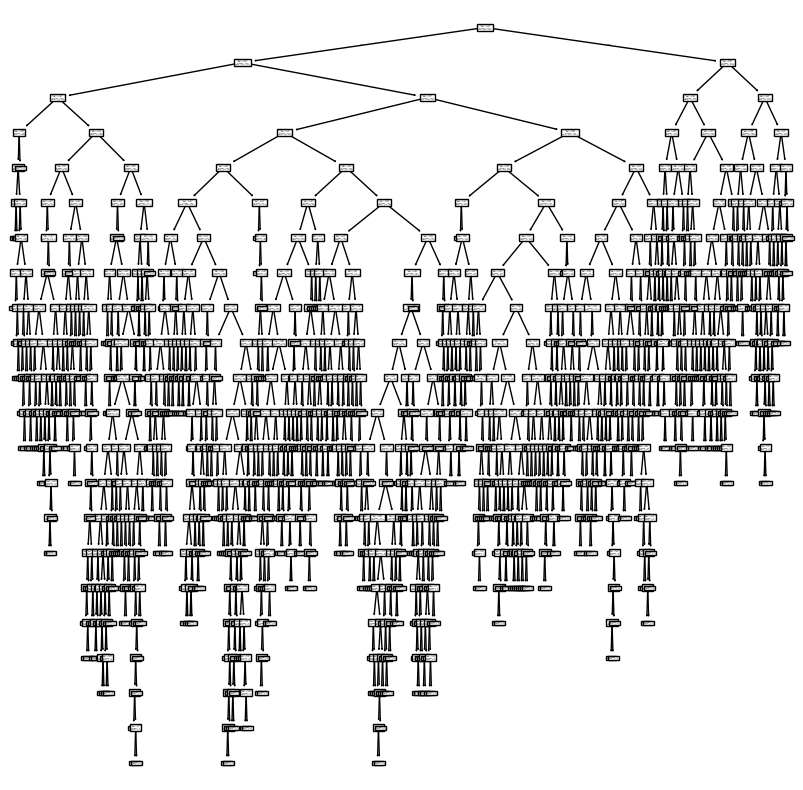

In [34]:
# 트리모양 시각화
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))
plot_tree(dt)
plt.show()

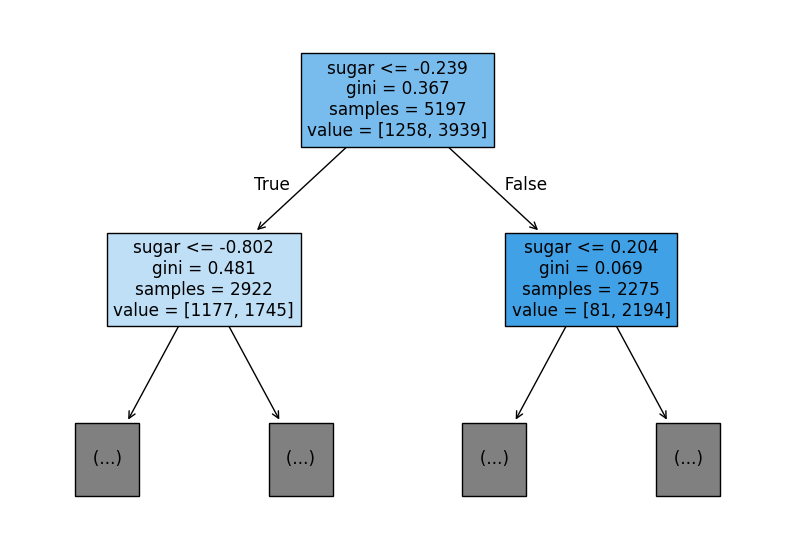

In [36]:
# 일부 node만 확대하여 시각화
plt.figure(figsize=(10,7))
plot_tree(dt, max_depth=1, filled=True, feature_names=['alcolo', 'sugar', 'pH'])
plt.show()

In [37]:
# 과적합 방지를 위한, 가지치기 feat.max_depth
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, X_test)

print(dt.score(train_scaled, X_test))
print(dt.score(test_scaled, y_test))

0.8454877814123533
0.8415384615384616


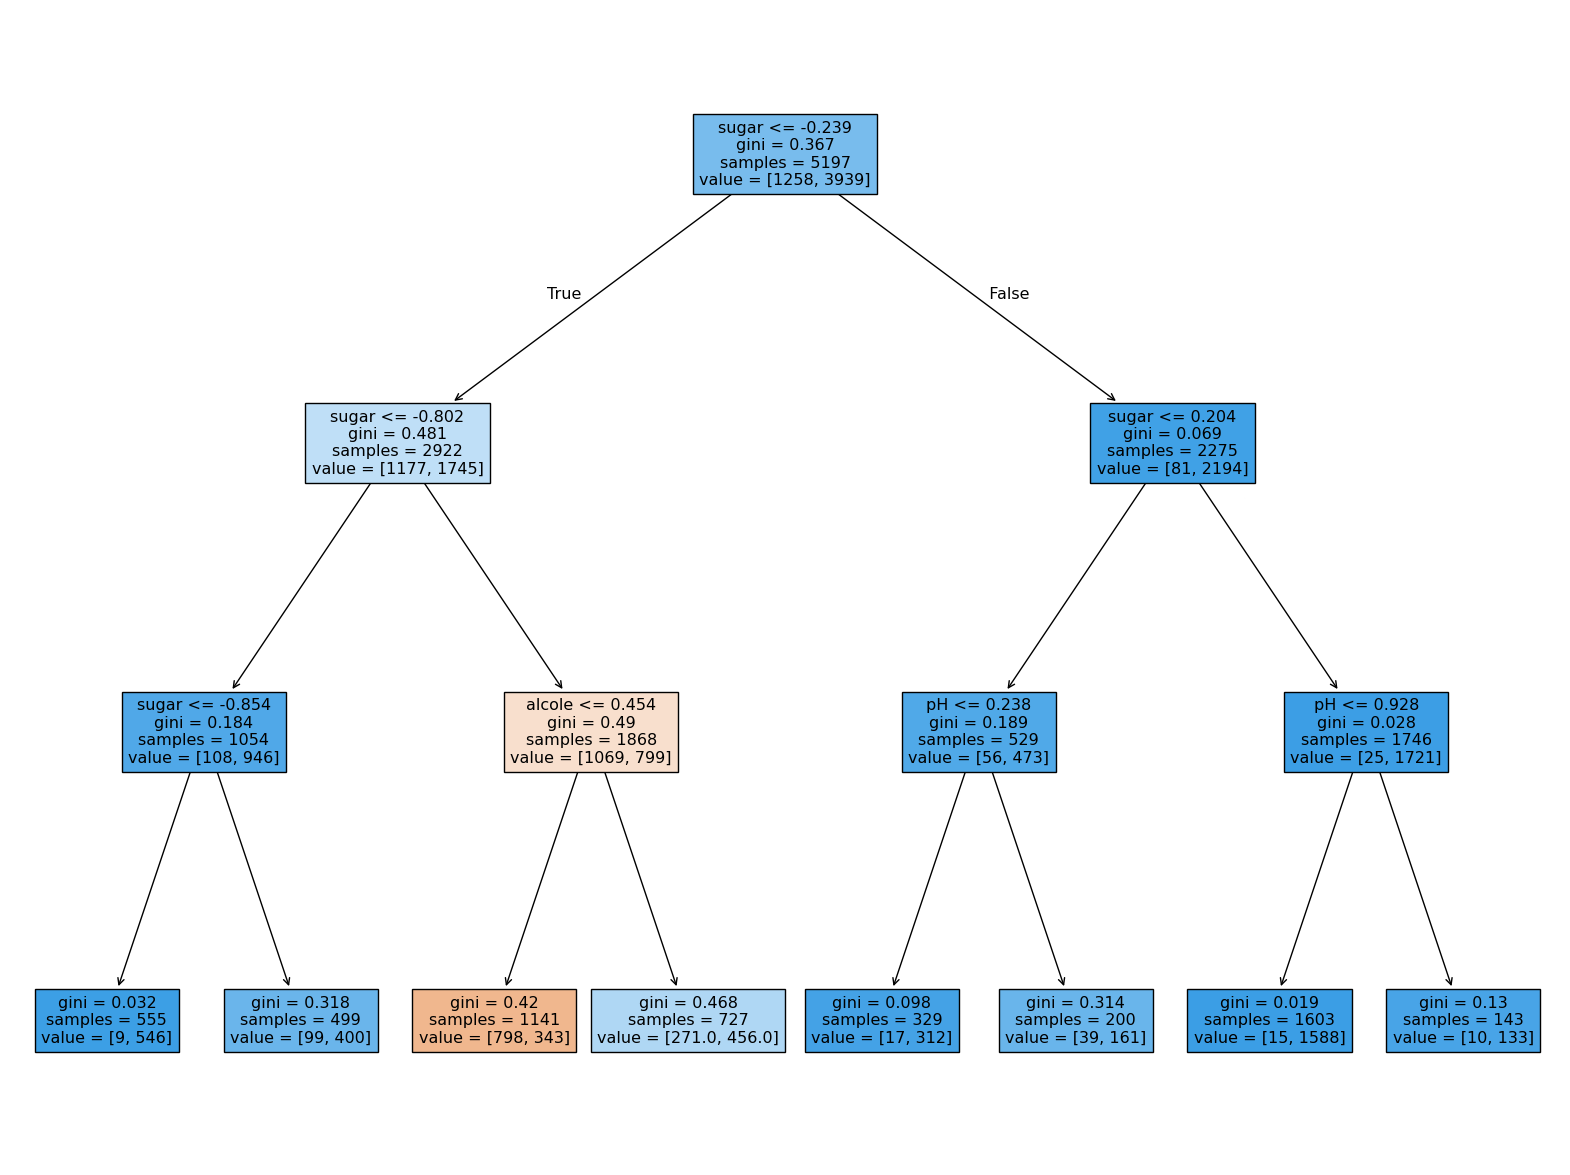

In [39]:
# 트리구조 시각화
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcole', 'sugar', 'pH'])
plt.show()

In [40]:
dt.predict(train_scaled[:5])

array([1., 1., 1., 1., 1.])

In [41]:
train_scaled[:5]

array([[ 0.01376574,  0.4646116 , -0.16888369],
       [ 1.60871671, -0.70299854,  0.26967864],
       [ 1.10504798, -0.70299854,  1.20945505],
       [ 1.0211032 , -0.89065017,  0.958848  ],
       [-0.99357172,  2.07007555, -0.67009777]])

In [42]:
# 스케일링 안된 데이터로 결정트리 모델 수행

dt.fit(X_train, X_test)

print(dt.score(X_train, X_test))
print(dt.score(y_train, y_test))

0.8454877814123533
0.8415384615384616


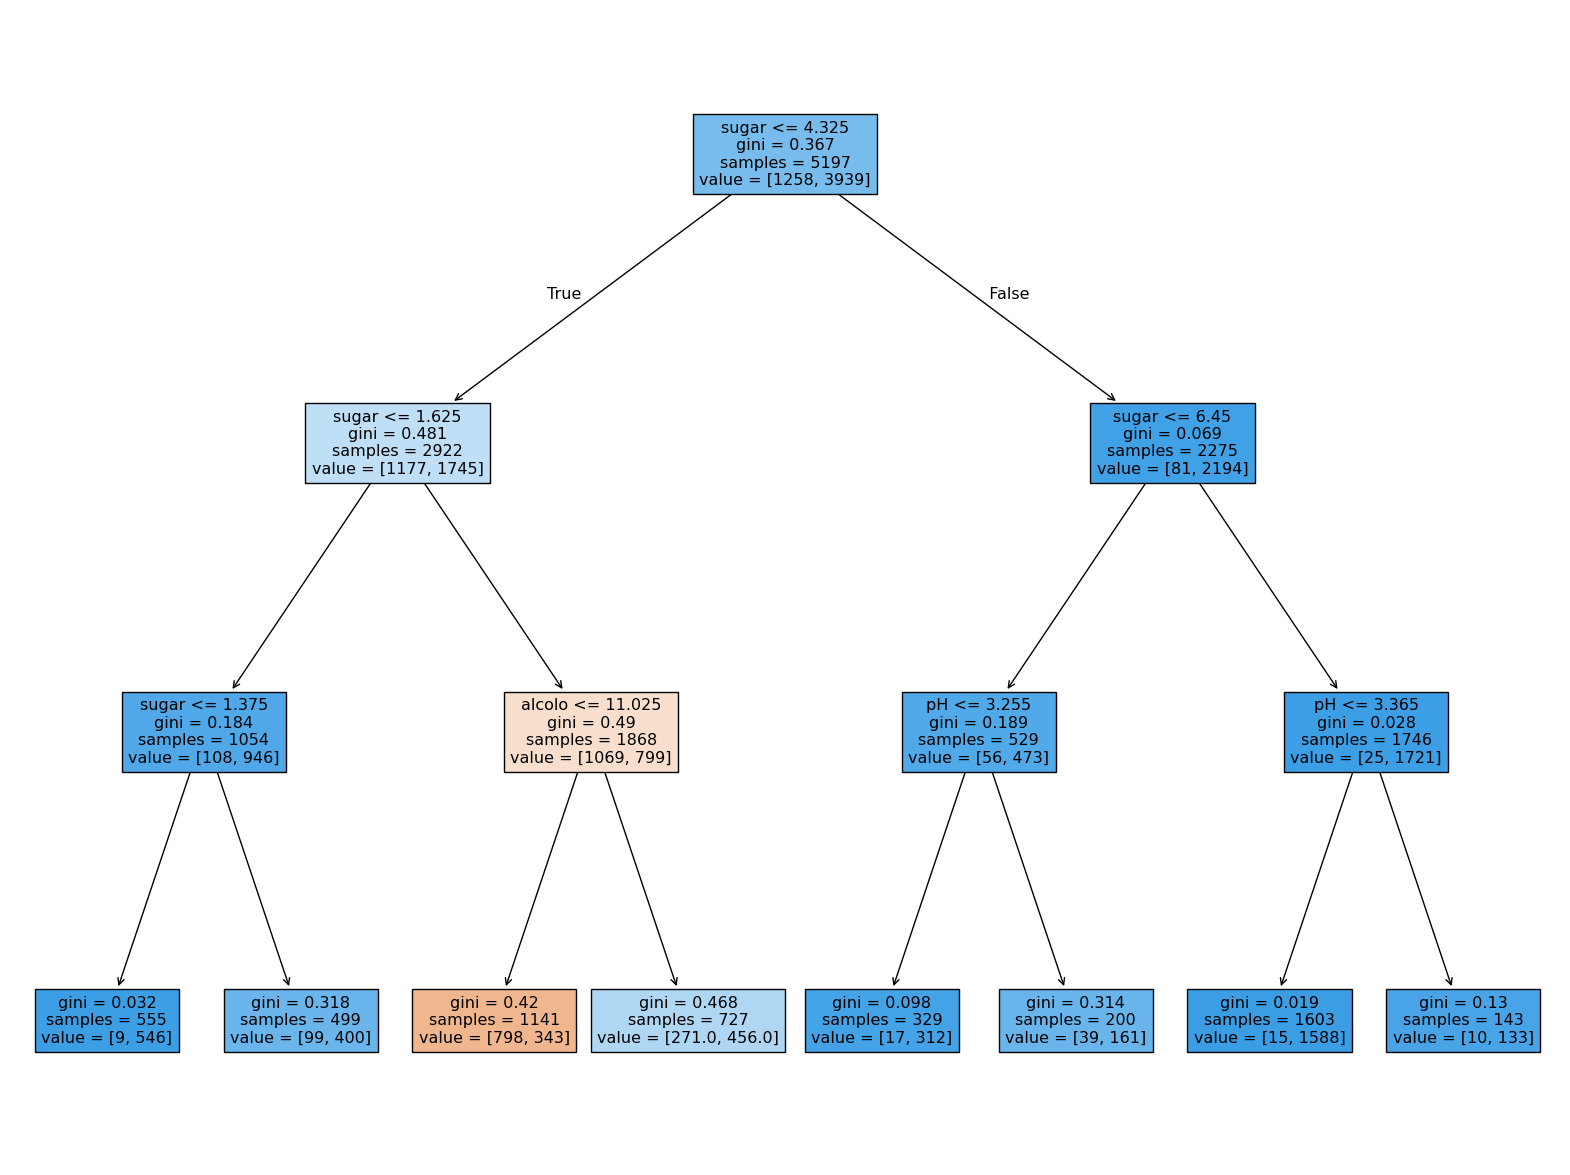

In [43]:
# 결정트리 시각화
plt.figure(figsize=(20,15))
plot_tree(dt, filled=True, feature_names=['alcolo', 'sugar', 'pH'])
plt.show()

In [46]:
# 특성별 중요도 확인
print(dt.feature_names_in_)
print(dt.feature_importances_)

['alcohol' 'sugar' 'pH']
[0.12345626 0.86862934 0.0079144 ]
